In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [3]:
tesla = pd.read_csv('Tesla_stock.csv')

In [4]:
tesla

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951
...,...,...,...,...,...,...
1253,2016-12-23,208.00,213.45,207.71,213.34,4670464
1254,2016-12-27,214.88,222.25,214.42,219.53,5915732
1255,2016-12-28,221.53,223.80,217.20,219.74,3782456
1256,2016-12-29,218.56,219.20,214.12,214.68,4044968


In [5]:
ford = pd.read_csv('Ford_Stock.csv')
gm = pd.read_csv('GM_stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv')

# visualization

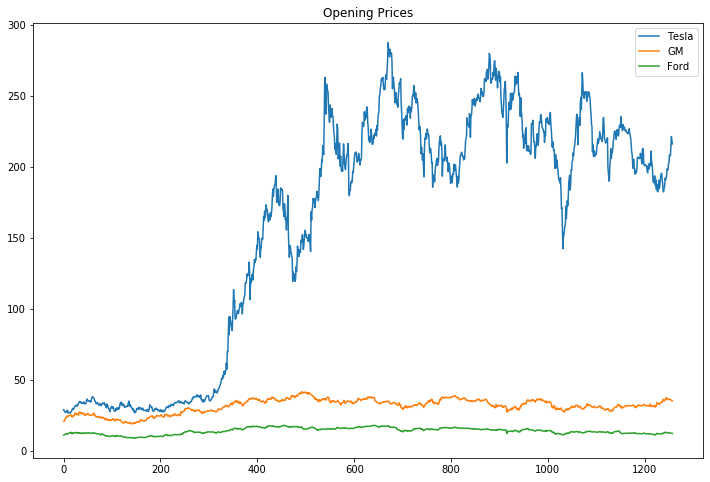

In [6]:
#plot open price
tesla['Open'].plot(label = 'Tesla',figsize=(12,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

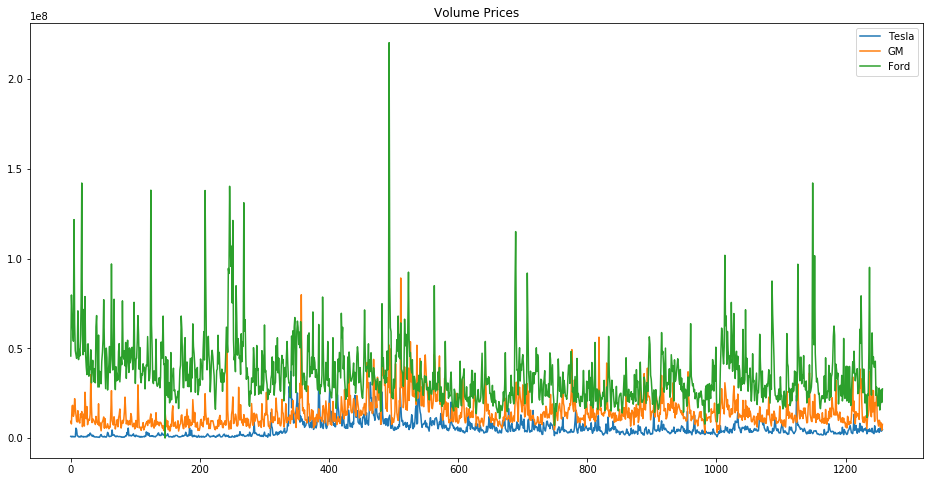

In [7]:
#plot volume
tesla['Volume'].plot(label = 'Tesla',figsize=(16,8),title='Volume Prices')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [8]:
#maximum volume of trade
ford['Volume'].argmax()


493

In [9]:
tesla['Total traded'] = tesla['Open']*tesla['Volume']
ford['Total traded'] = ford['Open']*ford['Volume']
gm['Total traded'] = gm['Open']*tesla['Volume']

Text(0, 0.5, 'Total traded')

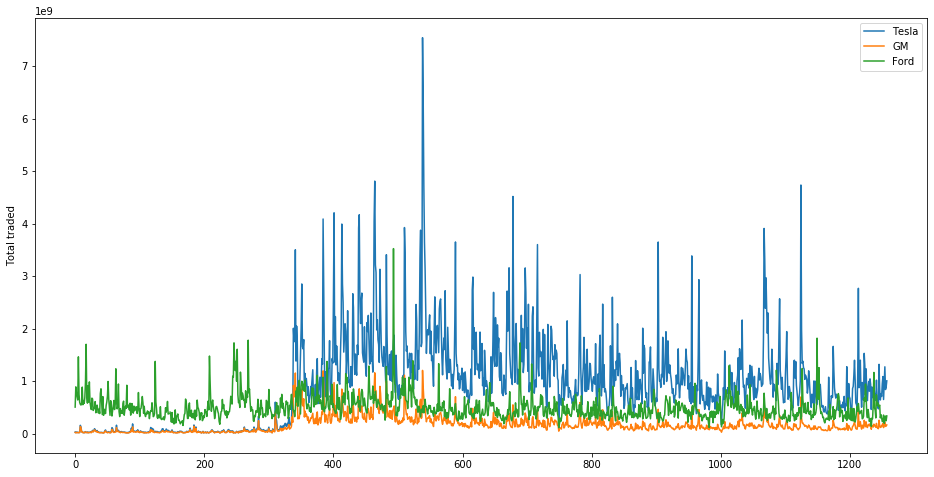

In [10]:
#plot against time index
tesla['Total traded'].plot(label='Tesla',figsize=(16,8))
gm['Total traded'].plot(label='GM')
ford['Total traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total traded')

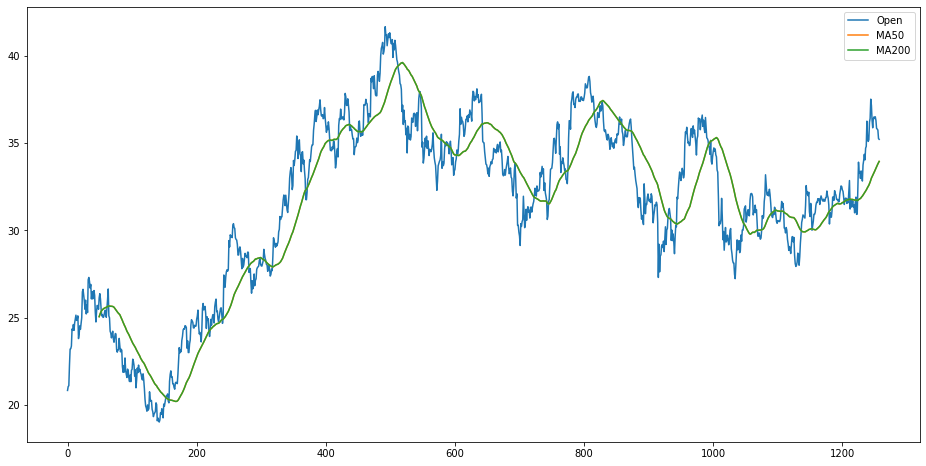

In [11]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200']=gm["Open"].rolling(50).mean()
gm[['Open',"MA50",'MA200']].plot(figsize=(16,8))

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
car_comp = pd.concat([tesla["Open"],gm['Open'],ford['Open']],axis=1)

In [14]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [15]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
0,28.94,20.83,11.00
1,28.21,21.05,11.15
2,27.76,21.10,11.33
3,27.20,22.26,11.74
4,27.00,23.20,11.83


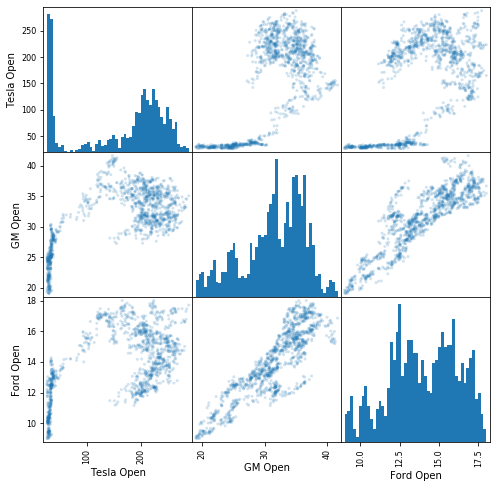

In [16]:
scatter_matrix(car_comp, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});

# Create a candlestick chart

In [17]:

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [18]:
conda install -c conda-forge mplfinance

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [19]:
import mplfinance

Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

𝑟𝑡=(𝑝𝑡/(𝑝𝑡−1))-1

In [20]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1 #shift one place forward

In [21]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total traded,returns
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [22]:
tesla['returns']

0            NaN
1      -0.013177
2      -0.021292
3      -0.008481
4       0.013388
          ...   
1253    0.023459
1254    0.029015
1255    0.000957
1256   -0.023027
1257   -0.004612
Name: returns, Length: 1258, dtype: float64

In [23]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [24]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total traded,returns
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [26]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

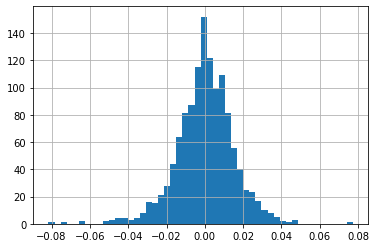

In [27]:
ford['returns'].hist(bins=50)

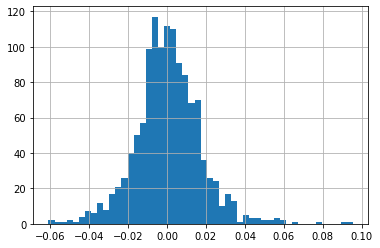

In [28]:
gm['returns'].hist(bins=50)

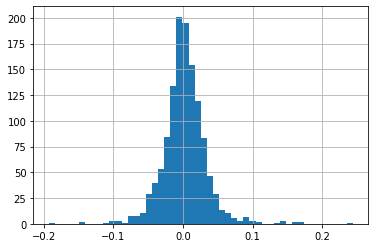

In [30]:
tesla['returns'].hist(bins=50)

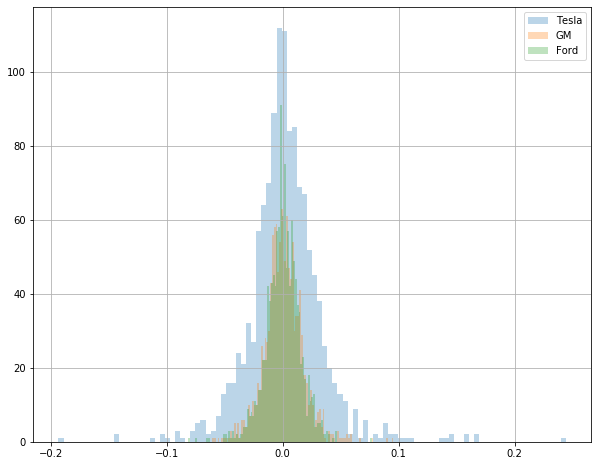

In [32]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.3)
gm['returns'].hist(bins=100,label='GM',alpha=0.3)
ford['returns'].hist(bins=100,label='Ford',alpha=0.3)
plt.legend()

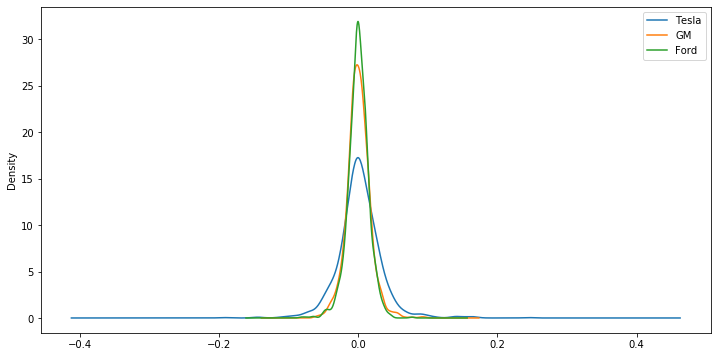

In [33]:
#Which stock has the widest plot?
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

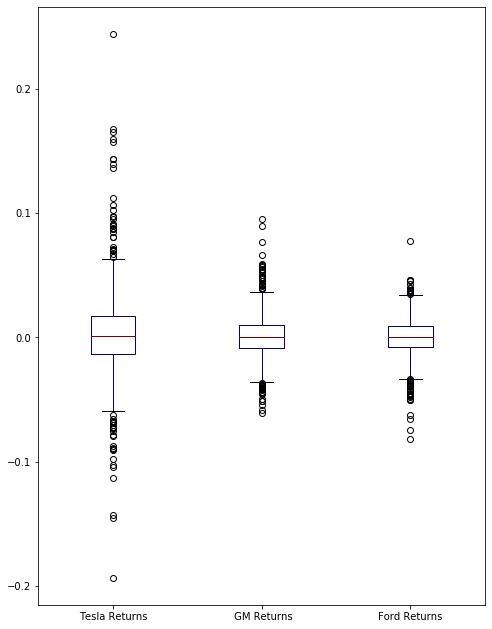

In [35]:
#creating some box plots comparing the returns.
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

compare daily returns

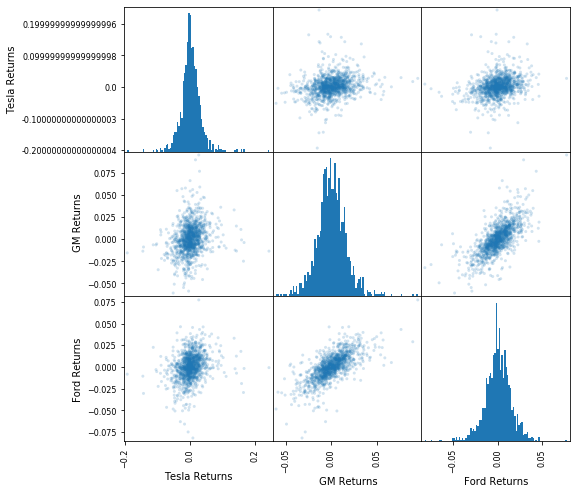

In [36]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

maybe  Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely
We plot them togetherb

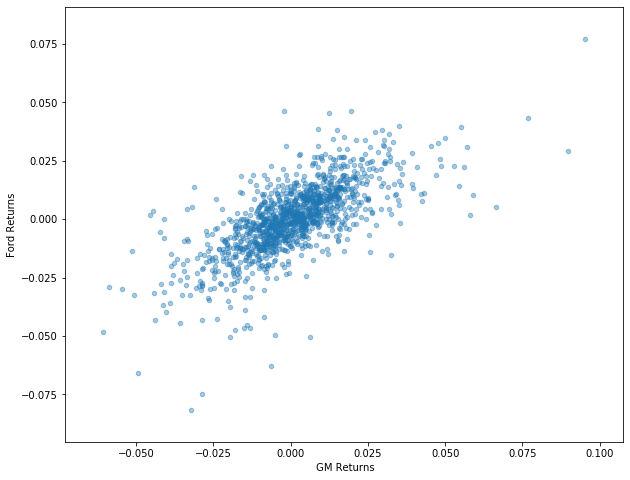

In [37]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

they are related sort of like linear regression

Cumulative Return: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss.

The formula for a cumulative daily return is:

𝑖𝑖=(1+𝑟𝑡)∗𝑖𝑡−1

In [38]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()


In [39]:
tesla

,Date,Open,High,Low,Close,Volume,Total traded,returns,Cumulative Return
0,2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,0.986823
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,0.965812
3,2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,0.957621
4,2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.970442
...,...,...,...,...,...,...,...,...,...
1253,2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,0.023459,7.597578
1254,2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,0.029015,7.818020
1255,2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,0.000957,7.825499
1256,2016-12-29,218.56,219.20,214.12,214.68,4044968,8.840682e+08,-0.023027,7.645299


In [40]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

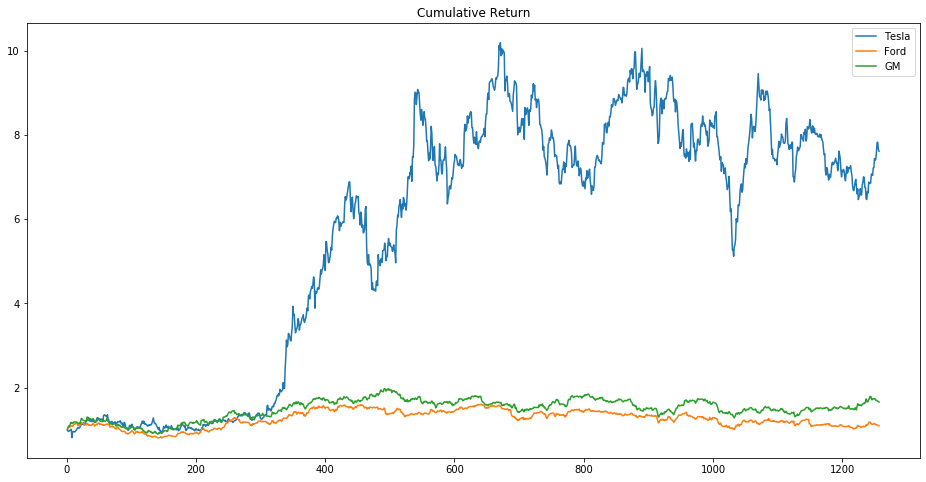

In [41]:
# plot the Cumulative Return columns against the time series index.
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()